In [30]:
# Load required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from KUtils.eda import chartil
from KUtils.common import utils as cutils

from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp
from KUtils.logistic_regression import auto_logistic_regression as autoglm

In [31]:
adult_income_df = pd.read_csv('cleaned.csv')

In [32]:
adult_income_df_dummy_converted_df = cutils.createDummies(adult_income_df, dummies_creation_drop_column_preference='dropMin', exclude_columns=['target'])


In [33]:
from sklearn.preprocessing import MinMaxScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

adult_income_df_dummy_converted_df[numerical_column_names] = scaler.fit_transform(
    adult_income_df_dummy_converted_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
adult_income_df_dummy_converted_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ White,sex_ Male,native-country_ United-States
0,0.301370,0.369201,0.800000,0.02174,0.0,0.397959,<=50K,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,0.452055,0.384604,0.800000,0.00000,0.0,0.122449,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0.287671,0.587798,0.533333,0.00000,0.0,0.397959,<=50K,0,0,1,...,1,0,0,0,0,0,0,1,1,1
3,0.493151,0.605907,0.400000,0.00000,0.0,0.397959,<=50K,0,0,1,...,0,0,0,0,0,0,1,0,1,1
4,0.150685,0.684072,0.800000,0.00000,0.0,0.397959,<=50K,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [35]:
adult_income_df_dummy_converted_df['target'] = adult_income_df_dummy_converted_df['target'].map(
    {' >50K':1, ' <=50K':0})


In [36]:
adult_income_df_dummy_converted_df.tail()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ White,sex_ Male,native-country_ United-States
30713,0.136986,0.625531,0.733333,0.000000,0.0,0.377551,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
30714,0.315068,0.516383,0.533333,0.000000,0.0,0.397959,1,0,0,1,...,0,0,0,0,0,0,0,1,1,1
30715,0.561644,0.512946,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
30716,0.068493,0.573291,0.533333,0.000000,0.0,0.193878,0,0,0,1,...,0,1,0,0,0,0,0,1,1,1
30717,0.479452,0.649557,0.533333,0.150242,0.0,0.397959,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [37]:
adult_income_df_dummy_converted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 58 columns):
age                                      30718 non-null float64
fnlwgt                                   30718 non-null float64
education-num                            30718 non-null float64
capital-gain                             30718 non-null float64
capital-loss                             30718 non-null float64
hours-per-week                           30718 non-null float64
target                                   30718 non-null int64
workclass_ Federal-gov                   30718 non-null uint8
workclass_ Local-gov                     30718 non-null uint8
workclass_ Private                       30718 non-null uint8
workclass_ Self-emp-inc                  30718 non-null uint8
workclass_ Self-emp-not-inc              30718 non-null uint8
workclass_ State-gov                     30718 non-null uint8
education_ 10th                          30718 non-null uint8
education_ 

In [38]:
adult_income_df_dummy_converted_df['target'] = adult_income_df_dummy_converted_df['target'].astype('int')

In [39]:
import importlib
importlib.reload(autoglm)

<module 'KUtils.logistic_regression.auto_logistic_regression' from 'D:\\projects\\datascience\\kesh-utils\\KUtils\\logistic_regression\\auto_logistic_regression.py'>

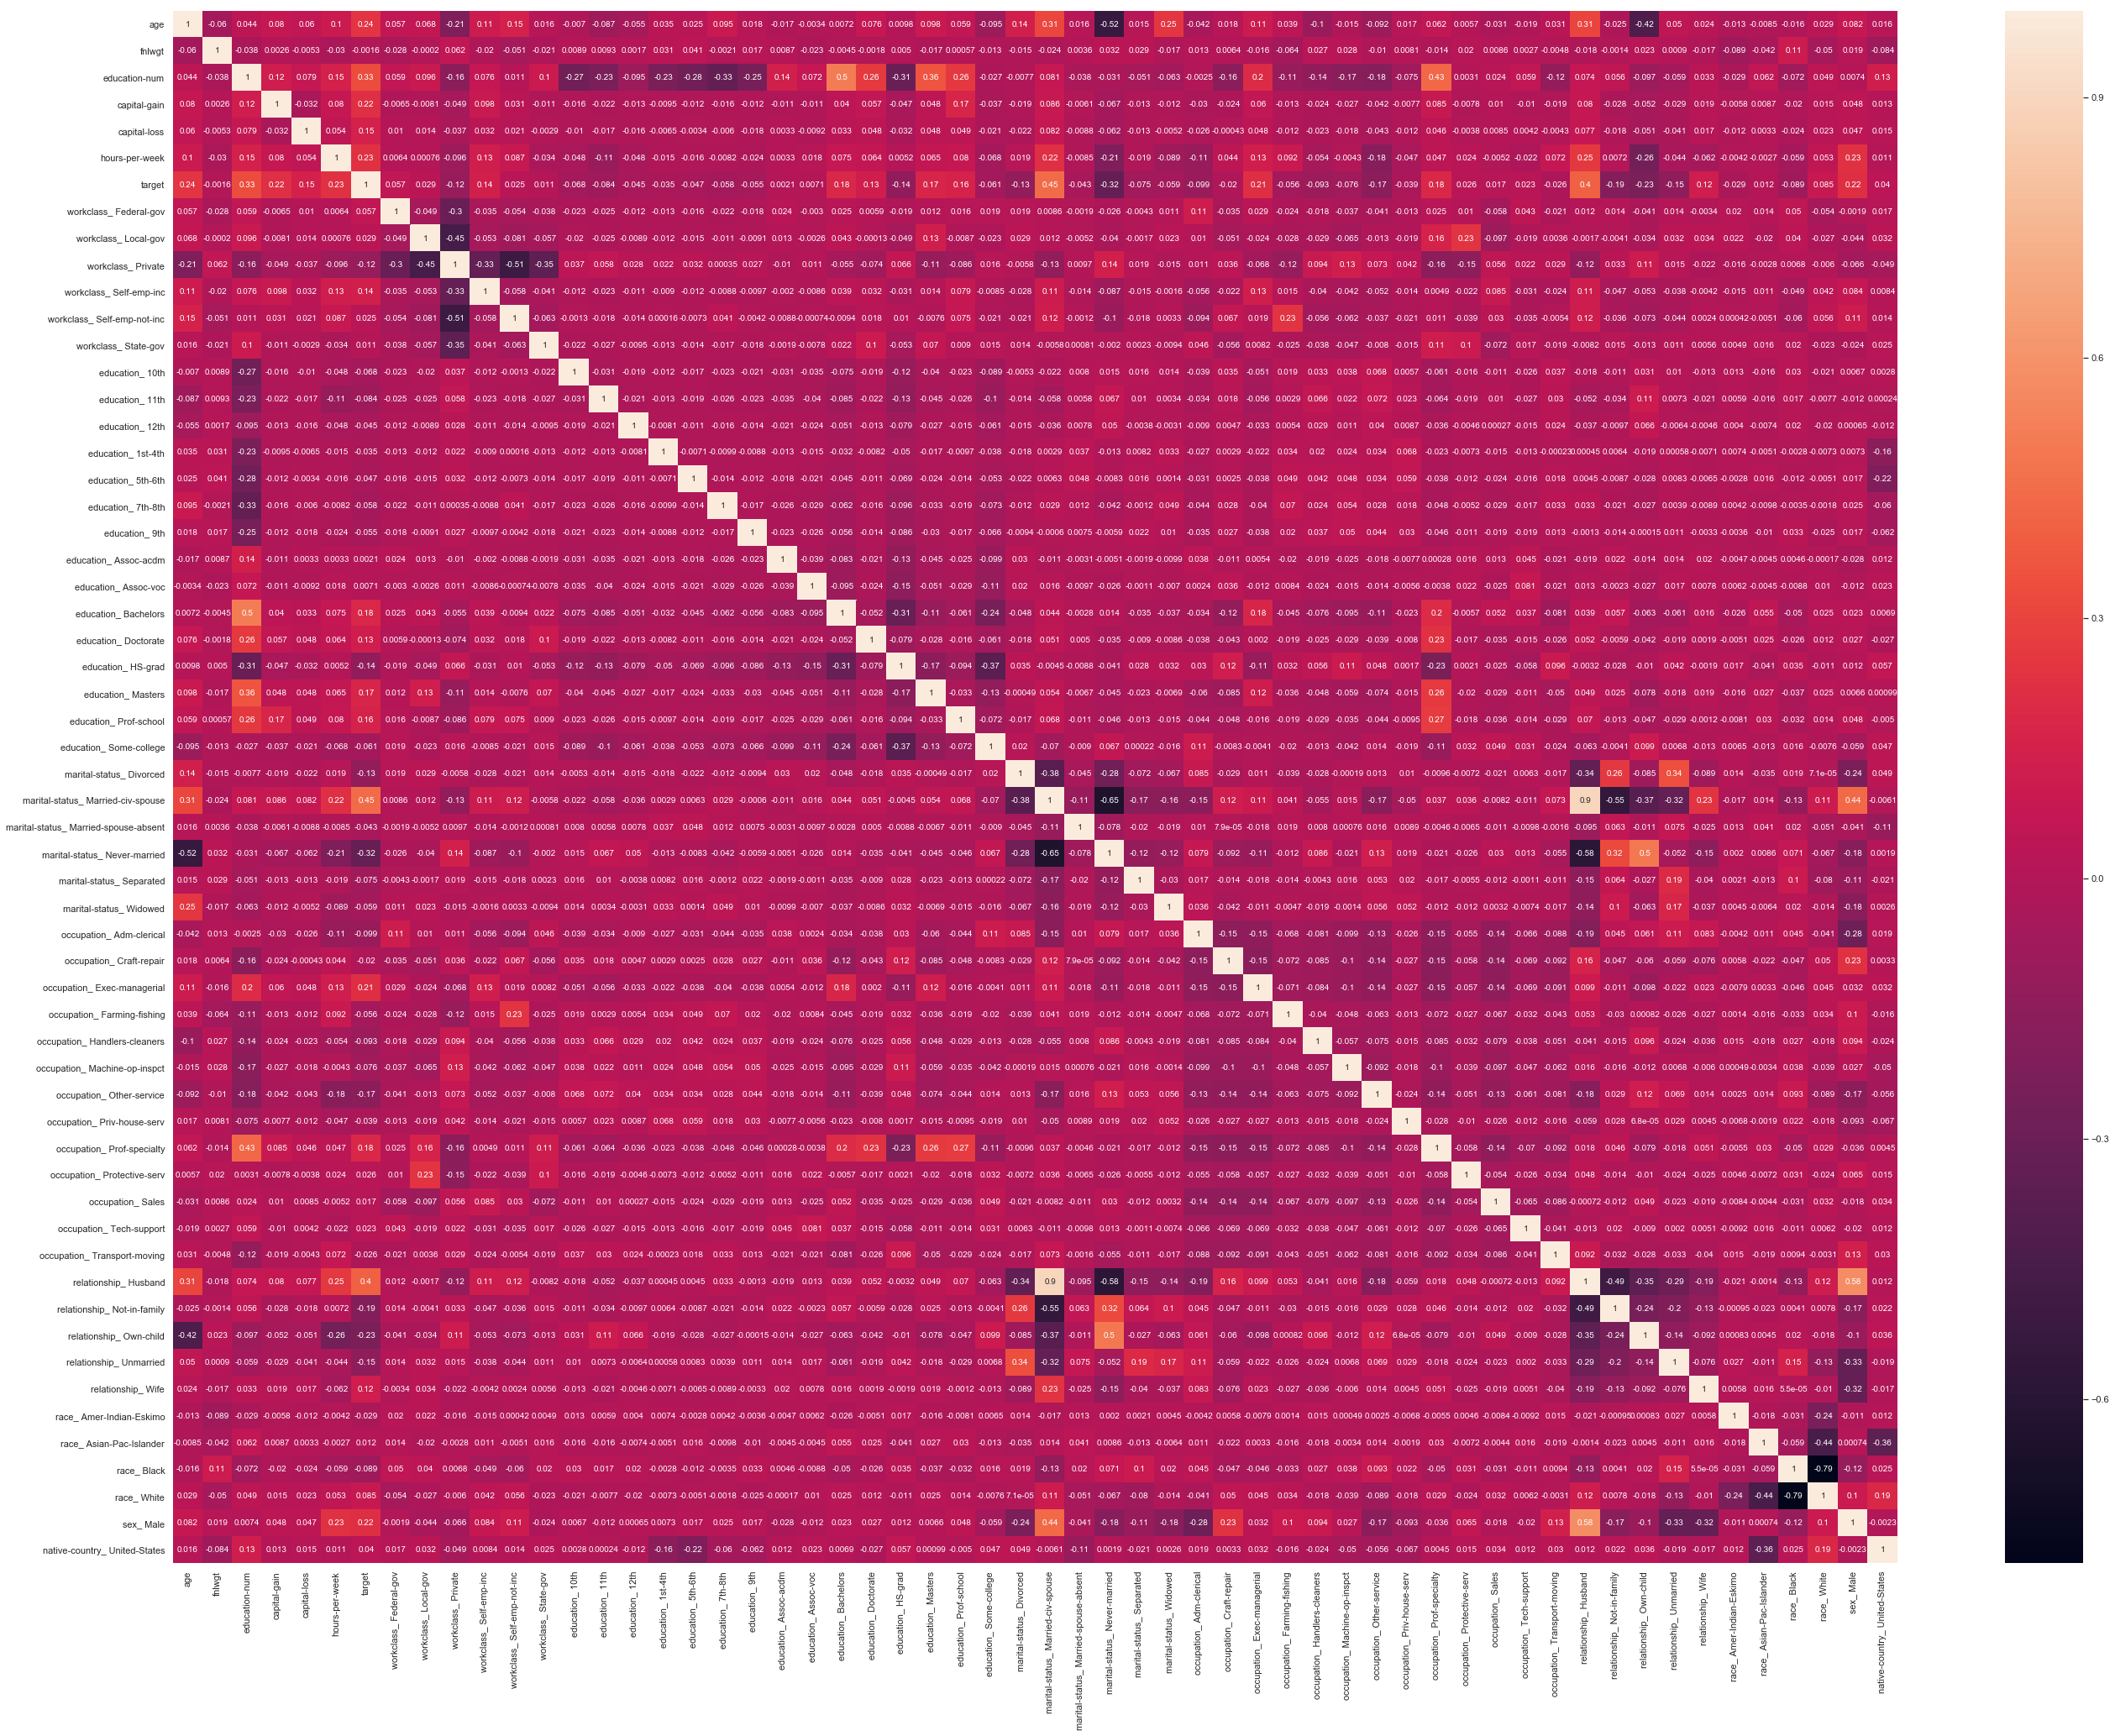

In [40]:
chartil.plot(adult_income_df_dummy_converted_df, adult_income_df_dummy_converted_df.columns)

In [42]:
from sklearn.preprocessing import MinMaxScaler
result = autoglm.fit(adult_income_df_dummy_converted_df, 'target',
        p_value_cutoff = 0.01,
        vif_cutoff = 5,
        scoring='roc_auc', # accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc 
        acceptable_model_performance = 0.02,
        cutoff_using = 'Sensitivity-Specificity', # Precision-Recall
        scale_numerical = False,                     
        scaler_object=MinMaxScaler(),
        dummies_creation_drop_column_preference='dropMin', # Available options dropFirst, dropMax, dropMin
        train_split_size = 0.7,
        max_features_to_select = 0, # max_features_to_select=0 means Select all fields
        random_state_to_use=100,
        include_data_in_return = True,
        verbose=True)


Numerical columns :['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'target', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Othe

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


First Model afte RFE
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8110957754282354
Removing education-num with Vif=495.57 p-value=0.9992897820865606
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8101554426829166
Removing occupation_ Sales with Vif=19.12 p-value=0.9997619155645083
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8104452984117566
Removing workclass_ Local-gov with Vif=10.37 p-value=0.9996330619210857
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8103730231877034
Removing occupation_ Priv-house-serv with Vif=1.08 p-value=0.9989280329513954
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8109512249801291
Removing race_ Amer-Indian-Eskimo with Vif=2.1 p-value=0.7642119134792256
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8109512249801291
Removing education_ Some-college with Vif=0.18 p-value=0.5891095792993657
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8111680506522886
Removing relationship

In [43]:
result['model_iteration_info'].head(15)

,comment,probability_cutoff,accuracy,sensitivity,specificity,precision,recall,f1_score,roc_auc
0,"After RFE(56)['age', 'fnlwgt', 'education-num'...",0.28,0.814128,0.805048,0.817144,0.593900,0.805048,0.683540,0.811096
1,Removing education-num with Vif=495.57 p-value...,0.28,0.812934,0.804613,0.815698,0.591869,0.804613,0.682036,0.810155
2,Removing occupation_ Sales with Vif=19.12 p-va...,0.28,0.813151,0.805048,0.815843,0.592190,0.805048,0.682405,0.810445
3,Removing workclass_ Local-gov with Vif=10.37 p...,0.28,0.813043,0.805048,0.815698,0.592000,0.805048,0.682279,0.810373
4,Removing occupation_ Priv-house-serv with Vif=...,0.28,0.813911,0.805048,0.816855,0.593519,0.805048,0.683287,0.810951
5,Removing race_ Amer-Indian-Eskimo with Vif=2.1...,0.28,0.813911,0.805048,0.816855,0.593519,0.805048,0.683287,0.810951
6,Removing education_ Some-college with Vif=0.18...,0.28,0.814236,0.805048,0.817288,0.594091,0.805048,0.683666,0.811168
7,Removing relationship_ Own-child with Vif=0.26...,0.28,0.814128,0.805048,0.817144,0.593900,0.805048,0.683540,0.811096
8,Removing workclass_ State-gov with Vif=0.21 p-...,0.28,0.814128,0.806353,0.816710,0.593720,0.806353,0.683890,0.811532
9,Removing education_ Assoc-voc with Vif=0.19 p-...,0.28,0.813477,0.806353,0.815843,0.592581,0.806353,0.683134,0.811098


In [44]:
result['model_iteration_info'].tail()

,comment,probability_cutoff,accuracy,sensitivity,specificity,precision,recall,f1_score,roc_auc
18,Removing fnlwgt with Vif=12.56 p-value=0.00104...,0.28,0.811089,0.805048,0.813096,0.588610,0.805048,0.680022,0.809072
19,Removing hours-per-week with Vif=10.84 p-value...,0.28,0.806966,0.801131,0.808904,0.582042,0.801131,0.674235,0.805018
20,Removing occupation_ Transport-moving with Vif...,0.28,0.806858,0.800696,0.808904,0.581910,0.800696,0.673993,0.804800
21,Removing age with Vif=5.01 p-value=8.155205955...,0.28,0.813043,0.774587,0.825817,0.596315,0.774587,0.673860,0.800202
22,"Final Model with ['capital-gain', 'capital-los...",0.28,0.813043,0.774587,0.825817,0.596315,0.774587,0.673860,0.800202


In [45]:
cutoff_df = result['cutoff_df']

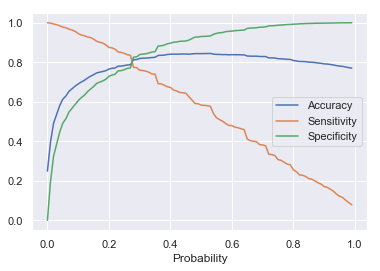

In [46]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

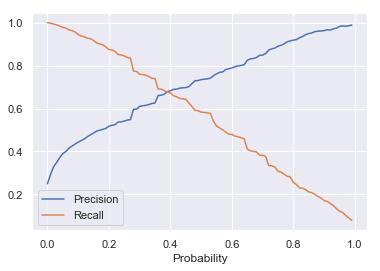

In [47]:
cutoff_df.plot.line(x='Probability', y=['Precision','Recall'])
plt.show()

In [48]:
final_confusion_matrix = result['confusion_matrix']
print(final_confusion_matrix)

[[5713 1205]
 [ 518 1780]]


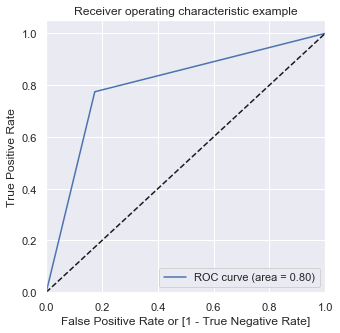

In [49]:
autoglm.draw_roc(result['prediction_df'])

In [50]:
result['p-values']

,Feature,p-value
9,education_ 1st-4th,1.734246e-03
8,education_ 12th,1.427360e-03
35,native-country_ United-States,9.683474e-04
10,education_ 5th-6th,7.996743e-05
29,occupation_ Protective-serv,3.959001e-05
30,occupation_ Tech-support,6.014475e-06
26,occupation_ Machine-op-inspct,3.626396e-06
12,education_ 9th,3.181783e-07
4,workclass_ Private,3.048370e-07
25,occupation_ Handlers-cleaners,1.346941e-07


In [51]:
result['vif-values']

,Feature,Vif
0,capital-gain,1.07
1,capital-loss,1.07
9,education_ 5th-6th,1.06
8,education_ 1st-4th,1.03
28,occupation_ Protective-serv,0.50
20,marital-status_ Separated,0.39
10,education_ 7th-8th,0.39
16,education_ Prof-school,0.38
6,education_ 11th,0.35
32,relationship_ Wife,0.33


# Build GLM model on WoE

In [83]:
from KUtils.classifier import generic_classifier_utils as gcu

In [84]:
adult_income_df = pd.read_csv('cleaned.csv')

In [85]:
categorical_to_treat = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [86]:
adult_income_df['target'] = adult_income_df['target'].map({' >50K':1, ' <=50K':0})

In [87]:
woe_converted_df, iv_df = gcu.iv_woe(adult_income_df, categorical_to_treat,target_column='target',
                                      value_preference='WoE', drop_original_column=True, show_woe=True)

workclass
Information value of workclass is 0.122989
               Level  workclass_WoE  workclass_IV
0        Federal-gov       0.641517      0.014731
1          Local-gov       0.231519      0.003859
2            Private      -0.169676      0.020356
3       Self-emp-inc       1.334145      0.079905
4   Self-emp-not-inc       0.183590      0.002914
5          State-gov       0.119024      0.000616
6        Without-pay      -1.000000      0.000607
education
Information value of education is 0.719473
            Level  education_WoE  education_IV
0            10th      -1.449603      0.037081
1            11th      -1.705662      0.060267
2            12th      -1.353916      0.015760
3         1st-4th      -2.115135      0.012095
4         5th-6th      -1.923629      0.020579
5         7th-8th      -1.540940      0.028084
6             9th      -1.718096      0.026708
7      Assoc-acdm       0.025935      0.000022
8       Assoc-voc       0.075559      0.000250
9       Bachelors       

D:\projects\datascience\kesh-utils\KUtils\classifier\generic_classifier_utils.py:237: RuntimeWarning: divide by zero encountered in log
  d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])



                 Level  occupation_WoE  occupation_IV
0         Adm-clerical       -0.758151       0.056995
1         Armed-Forces       -0.975701       0.000211
2         Craft-repair       -0.123637       0.001976
3      Exec-managerial        1.039774       0.172921
4      Farming-fishing       -0.930112       0.021460
5    Handlers-cleaners       -1.599647       0.071056
6    Machine-op-inspct       -0.843312       0.036490
7        Other-service       -2.033973       0.242025
8      Priv-house-serv       -3.893472       0.024471
9       Prof-specialty        0.899165       0.129592
10     Protective-serv        0.373380       0.003209
11               Sales        0.105640       0.001361
12        Tech-support        0.279937       0.002529
13    Transport-moving       -0.280207       0.003791
relationship
Information value of relationship is 1.492828
             Level  relationship_WoE  relationship_IV
0          Husband          0.926007         0.423154
1    Not-in-family    

In [88]:
woe_converted_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_WoE,education_WoE,marital-status_WoE,occupation_WoE,relationship_WoE,race_WoE,sex_WoE,native-country_WoE
0,39,11.258240,13,2174,0,40,0,0.119024,0.780619,-1.869967,-0.758151,-1.022756,0.078565,0.321266,0.028184
1,50,11.330336,13,0,0,13,0,0.183590,0.780619,0.922340,1.039774,0.926007,0.078565,0.321266,0.028184
2,38,12.281393,9,0,0,40,0,-0.169676,-0.529236,-1.014595,-1.599647,-1.022756,0.078565,0.321266,0.028184
3,53,12.366153,7,0,0,40,0,-0.169676,-1.705662,0.922340,-1.599647,0.926007,-0.797735,0.321266,0.028184
4,28,12.732011,13,0,0,40,0,-0.169676,0.780619,0.922340,0.899165,1.068894,-0.797735,-0.951793,-0.326878


In [89]:
from sklearn.preprocessing import MinMaxScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

woe_converted_df[numerical_column_names] = scaler.fit_transform(
    woe_converted_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [90]:
woe_converted_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_WoE,education_WoE,marital-status_WoE,occupation_WoE,relationship_WoE,race_WoE,sex_WoE,native-country_WoE
0,0.301370,0.369201,0.800000,0.02174,0.0,0.397959,0,0.119024,0.780619,-1.869967,-0.758151,-1.022756,0.078565,0.321266,0.028184
1,0.452055,0.384604,0.800000,0.00000,0.0,0.122449,0,0.183590,0.780619,0.922340,1.039774,0.926007,0.078565,0.321266,0.028184
2,0.287671,0.587798,0.533333,0.00000,0.0,0.397959,0,-0.169676,-0.529236,-1.014595,-1.599647,-1.022756,0.078565,0.321266,0.028184
3,0.493151,0.605907,0.400000,0.00000,0.0,0.397959,0,-0.169676,-1.705662,0.922340,-1.599647,0.926007,-0.797735,0.321266,0.028184
4,0.150685,0.684072,0.800000,0.00000,0.0,0.397959,0,-0.169676,0.780619,0.922340,0.899165,1.068894,-0.797735,-0.951793,-0.326878


In [91]:
#woe_converted_df=woe_converted_df.drop(['capital-gain', 'capital-loss'], axis=1)

In [92]:
from sklearn.preprocessing import MinMaxScaler
result = autoglm.fit(woe_converted_df, 'target',
        p_value_cutoff = 0.01,
        vif_cutoff = 5,
        scoring='roc_auc', # accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc 
        acceptable_model_performance = 0.02,
        cutoff_using = 'Sensitivity-Specificity', # Precision-Recall
        scale_numerical = False,                     
        scaler_object=MinMaxScaler(),
        dummies_creation_drop_column_preference='dropMin', # Available options dropFirst, dropMax, dropMin
        default_list_of_columns_to_retain=['education-num'],
        train_split_size = 0.7,
        max_features_to_select = 0, # max_features_to_select=0 means Select all fields
        random_state_to_use=100,
        include_data_in_return = True,
        verbose=True)


Numerical columns :['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'target', 'workclass_WoE', 'education_WoE', 'marital-status_WoE', 'occupation_WoE', 'relationship_WoE', 'race_WoE', 'sex_WoE', 'native-country_WoE']
Categorical columns :Index([], dtype='object')
before dummies=Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'workclass_WoE', 'education_WoE',
       'marital-status_WoE', 'occupation_WoE', 'relationship_WoE', 'race_WoE',
       'sex_WoE', 'native-country_WoE'],
      dtype='object')
after dummies=Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'workclass_WoE', 'education_WoE',
       'marital-status_WoE', 'occupation_WoE', 'relationship_WoE', 'race_WoE',
       'sex_WoE', 'native-country_WoE'],
      dtype='object')
Building model...


C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


First Model afte RFE
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8039299605901885
Removing native-country_WoE with Vif=1.03 p-value=0.08163812304985878
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8032772190758282
Removing education_WoE with Vif=3.2 p-value=0.070190326625387
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8028405484010003
Removing workclass_WoE with Vif=1.08 p-value=0.03798190604851816
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8037116252527747
Removing race_WoE with Vif=1.04 p-value=0.028734595124357908
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.804217551821147
Removing fnlwgt with Vif=10.87 p-value=9.691178899468571e-05
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8032034341865206
Removing hours-per-week with Vif=8.92 p-value=5.379721582183498e-38
probability_cutoff:0.28
probability_cutoff=0.28 roc_auc=0.8005917132964521
Removing relationship_WoE with Vif=5.49 p-value=1.1363872627676708e-

In [93]:
result['model_iteration_info'].head(10)

,comment,probability_cutoff,accuracy,sensitivity,specificity,precision,recall,f1_score,roc_auc
0,"After RFE(13)['age', 'fnlwgt', 'education-num'...",0.28,0.806424,0.798956,0.808904,0.581381,0.798956,0.673021,0.803930
1,Removing native-country_WoE with Vif=1.03 p-va...,0.28,0.806098,0.797650,0.808904,0.580983,0.797650,0.672290,0.803277
2,Removing education_WoE with Vif=3.2 p-value=0....,0.28,0.806315,0.795909,0.809772,0.581558,0.795909,0.672056,0.802841
3,Removing workclass_WoE with Vif=1.08 p-value=0...,0.28,0.806532,0.798085,0.809338,0.581668,0.798085,0.672904,0.803712
4,Removing race_WoE with Vif=1.04 p-value=0.0287...,0.28,0.807292,0.798085,0.810350,0.582962,0.798085,0.673769,0.804218
5,Removing fnlwgt with Vif=10.87 p-value=9.69117...,0.28,0.806424,0.796780,0.809627,0.581639,0.796780,0.672420,0.803203
6,Removing hours-per-week with Vif=8.92 p-value=...,0.28,0.805339,0.791123,0.810061,0.580460,0.791123,0.669613,0.800592
7,Removing relationship_WoE with Vif=5.49 p-valu...,0.27,0.801107,0.798085,0.802110,0.572588,0.798085,0.666788,0.800098
8,"Final Model with ['age', 'education-num', 'cap...",0.27,0.801107,0.798085,0.802110,0.572588,0.798085,0.666788,0.800098


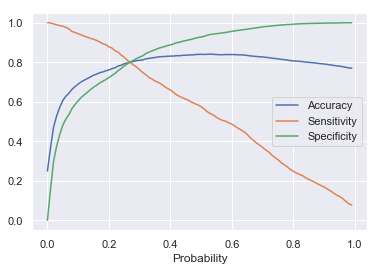

In [94]:
cutoff_df = result['cutoff_df']
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

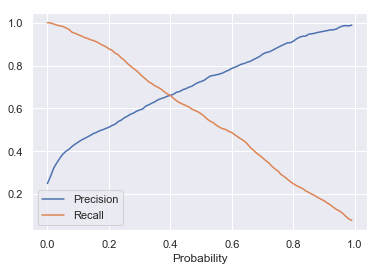

In [95]:
cutoff_df.plot.line(x='Probability', y=['Precision','Recall'])
plt.show()

In [96]:
final_confusion_matrix = result['confusion_matrix']
print(final_confusion_matrix)

[[5549 1369]
 [ 464 1834]]


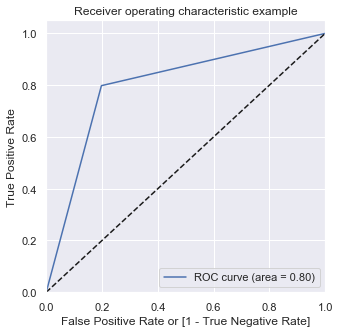

In [97]:
autoglm.draw_roc(result['prediction_df'])

In [98]:
result['p-values']

,Feature,p-value
1,age,5.880077e-32
4,capital-loss,8.542556e-48
6,occupation_WoE,1.960695e-92
3,capital-gain,9.521928e-158
2,education-num,5.696303e-168
0,const,0.000000e+00
5,marital-status_WoE,0.000000e+00


In [99]:
result['vif-values']

,Feature,Vif
1,education-num,3.91
0,age,3.60
4,marital-status_WoE,1.31
5,occupation_WoE,1.11
3,capital-loss,1.07
2,capital-gain,1.05
